# Waldrapp Data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [10]:
## Load Enea data
s_path = os.getcwd()

print(s_path, base_path)

enea_df = pd.read_csv(base_path + '/waldrapp/data/Enea.csv')
enea_df

/Users/alexandreputtick/Dropbox/Projects/Latent Spaces Project/Github Repos/animal-beacons /Users/alexandreputtick/Dropbox/Projects/Latent Spaces Project/Github Repos/animal-beacons


,device_id,UTC_datetime,UTC_date,UTC_time,datatype,satcount,U_bat_mV,bat_soc_pct,solar_I_mA,hdop,...,speed_km_h,direction_deg,temperature_C,mag_x,mag_y,mag_z,acc_x,acc_y,acc_z,Unnamed: 22
0,181780,2021-01-04 10:33:06,2021-01-04,10:33:06,GPS,7,3620,0,16,1.4,...,0,28,12,234,279,-157,142,-670,747,NaN
1,181780,2021-01-06 11:03:06,2021-01-06,11:03:06,GPS,0,3631,0,11,0.0,...,0,0,14,156,200,-115,29,-460,1127,NaN
2,181780,2021-01-06 18:52:26,2021-01-06,18:52:26,GPS,0,3687,3,0,0.0,...,0,0,15,4,158,11,174,-401,918,NaN
3,181780,2021-01-11 11:39:35,2021-01-11,11:39:35,GPS,7,3620,0,6,1.0,...,0,354,17,337,59,-168,85,-777,752,NaN
4,181780,2021-01-12 12:09:59,2021-01-12,12:09:59,GPS,5,3662,0,15,1.5,...,0,191,24,398,72,-166,236,-667,737,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10282,181780,2022-01-15 19:29:27,2022-01-15,19:29:27,GPS,5,3678,1,0,1.8,...,0,23,16,356,313,-137,72,-433,908,NaN
10283,181780,2022-01-15 19:29:27,2022-01-15,19:29:27,GPS,5,3678,1,0,1.8,...,0,23,16,356,313,-137,72,-433,908,NaN
10284,181780,2022-01-16 10:57:35,2022-01-16,10:57:35,GPS,8,3637,0,15,0.9,...,59,162,18,83,91,-56,8,-196,457,NaN
10285,181780,2022-01-17 10:57:18,2022-01-17,10:57:18,GPS,8,3614,0,14,0.9,...,43,103,17,63,74,-24,278,-200,974,NaN


In [12]:
enea_df.columns

Index(['device_id', 'UTC_datetime', 'UTC_date', 'UTC_time', 'datatype',
       'satcount', 'U_bat_mV', 'bat_soc_pct', 'solar_I_mA', 'hdop', 'Latitude',
       'Longitude', 'Altitude_m', 'speed_km_h', 'direction_deg',
       'temperature_C', 'mag_x', 'mag_y', 'mag_z', 'acc_x', 'acc_y', 'acc_z',
       'Unnamed: 22'],
      dtype='object')

In [31]:
enea_gps_df = enea_df[['Latitude','Longitude']]

In [32]:
enea_gps_df = enea_gps_df.drop(enea_gps_df[enea_gps_df.Latitude == 0].index)

(39.198525, 47.665666)

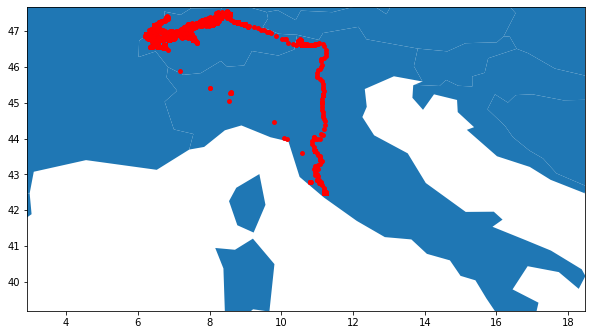

In [45]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(enea_gps_df['Longitude'], enea_gps_df['Latitude'])]
gdf = GeoDataFrame(enea_gps_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
minx, miny, maxx, maxy = [2.907049,39.198525,18.463690,47.665666]



plot = gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)
plot.set_xlim(minx, maxx)
plot.set_ylim(miny, maxy)